# Question: Does age of rider affect the ride duration of Citi Bike trips?

## Alternative hypothesis: There is a negative correlation between age of riders and trip duration, with a .05 confidence level.
    
## Null hypothesis: Age and trip duration are inversely related at less than a .05 confidence interval OR there is no apparent relationship OR there is a positive relationship.

In [1]:
from __future__  import print_function, division
import os
import statsmodels.api as sm
import pylab as pl

import pandas as pd
import scipy
import numpy as np
%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import json
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  3346k      0  0:00:05  0:00:05 --:--:-- 3809k


In [3]:
get_ipython().system('unzip 201601-citibike-tripdata.zip')

Archive:  201601-citibike-tripdata.zip
replace 201601-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
df = pd.read_csv('201601-citibike-tripdata.csv')

In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952,1


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [7]:
df.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [8]:
df.head()
# gender 1 is male, 2 is female

,tripduration,birth year
0,923,1958
1,379,1969
2,589,1982
3,889,1961
4,1480,1952


In [9]:
df['age'] = 2016 - df['birth year']
# df['age'].dropna(inplace= True)
# df['tripduration'].dropna(inplace= True)
# dropping NaN later instead

x = df['age']
y = df['tripduration']

Text(0.5,1,'Figure A: Relationship between age and trip duration of Citi Bike riders, January 2016')

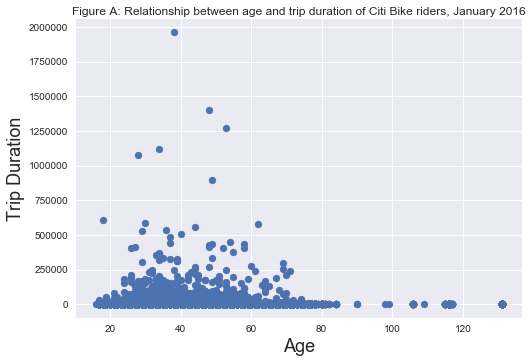

In [10]:
pl.scatter(x, y)

pl.xlabel('Age', fontsize = 18)
pl.ylabel('Trip Duration', fontsize = 18)
pl.title('Figure A: Relationship between age and trip duration of Citi Bike riders, January 2016')

In [11]:
# dropping NaN
array1 = x.dropna().values
len(array1)

484933

In [12]:
array2 = y.dropna().values
len(array2)

509478

In [13]:
array3 = np.random.choice(array2, 484933, replace = False)
len(array3)

484933

In [14]:
array1 = sorted(array1, key=int)
array3 = sorted(array3, key=int)

In [15]:
correlation = scipy.stats.pearsonr(array1, array3)
print (correlation)

(0.19587603504190462, 0.0)


# We cannot reject the null hypothesis. The Pearson test showed a correlation coefficient of .21 with a p-value of 0.0, meaning we can be confident that the two variables have a slight positive correlation. As age goes up, so does trip duration.

In [16]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32.9M  100 32.9M    0     0  5448k      0  0:00:06  0:00:06 --:--:-- 7026k


In [17]:
os.path.isfile("201507-citibike-tripdata.zip")

True

In [18]:
os.system("mv " + "201507-citibike-tripdata.zip " + os.getenv("PUIDATA"))

0

In [19]:
os.path.isfile("201507-citibike-tripdata.zip"), os.path.isfile(os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

(False, True)

In [20]:
os.system("unzip " + os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

256

In [21]:
print("unzip " + os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

unzip /Users/fbianco/science/Dropbox//UI/PUIdata/201507-citibike-tripdata.zip


In [22]:
os.path.isfile("201507-citibike-tripdata.csv")

True

In [23]:
os.path.isfile(os.getenv("PUIDATA") + "/201507-citibike-tripdata.csv")

False

In [24]:
os.system("mv " + "201507-citibike-tripdata.csv " + os.getenv("PUIDATA"))

0

In [25]:
os.path.isfile(os.getenv("PUIDATA") + "/201507-citibike-tripdata.csv")

True

In [26]:
df2 = pd.read_csv(os.getenv("PUIDATA") + '/201507-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988,1


In [27]:
df2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [28]:
df2.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [29]:
df2.head()

,tripduration,birth year
0,732,1970
1,322,1984
2,790,1992
3,1228,1990
4,1383,1988


In [30]:
df2['age'] = 2015 - df2['birth year']

x2 = df2['age']
y2 = df2['tripduration']

Text(0.5,1,'Figure B: Relationship between age and trip duration of Citi Bike riders, July 2015')

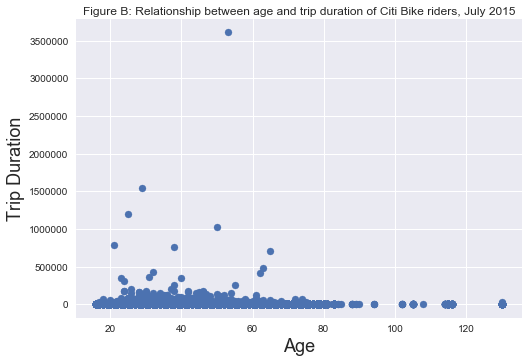

In [31]:
# notice the distribution looks the same as figure A
pl.scatter(x2, y2)

pl.xlabel('Age', fontsize = 18)
pl.ylabel('Trip Duration', fontsize = 18)
pl.title('Figure B: Relationship between age and trip duration of Citi Bike riders, July 2015')

In [32]:
# removing NaN
arrayx2 = x2.dropna().values
arrayy2 = y2.dropna().values

In [33]:
array4 = np.random.choice(arrayy2, 905311, replace = False)
len(array4)

905311

In [34]:
len(arrayx2)

905311

In [35]:
arrayx2 = sorted(arrayx2, key=int)
array4 = sorted(array4, key=int)

In [36]:
correlation = scipy.stats.pearsonr(arrayx2, array4)
print (correlation)

(0.19093069187746983, 0.0)


# These results back up those we got from the first sample. We have a correlation coefficient of .21 (same as previous test) and again, a p-value of 0.0. For Citi Bike riders in both January and July, age and trip duration have a slight positive correlation. The Null stands.

# FBB your analysis is wrong: by sorging array1 and array2 independently (very bad names by the way)  you are splitting the pairs age-trip duration. So the subsequent analysis makes no sense.
# If you had plotted your data you would have seen this

Text(0,0.5,'Trip Duration')

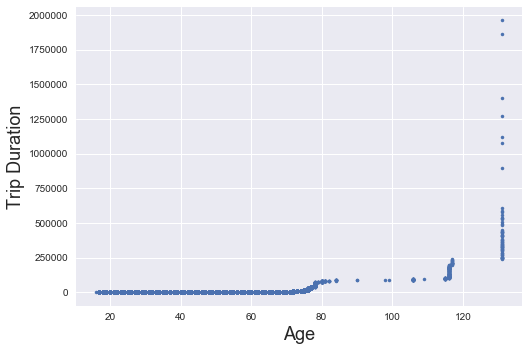

In [63]:
pl.plot(array1,array3,'.')
pl.xlabel("Age", fontsize=18)
pl.ylabel("Trip Duration", fontsize=18)

# Figure 1. this is the wrongly sorted data for Age and Duration, by sorting Age and duration independently you split the age-duration pairs. In addition the plot shows that the long duration trips are associated to ages too large to be reliable data.

In [56]:
sortingArray = np.argsort(array1)
Age =  np.array(array1)[sortingArray]
AgeReduct = Age[Age < 80]
DurationSort = np.random.choice(array3, len(Age), replace = False)
DurationReductSort = np.random.choice(array3, len(AgeReduct), replace = False)

Text(0,0.5,'Trip Duration')

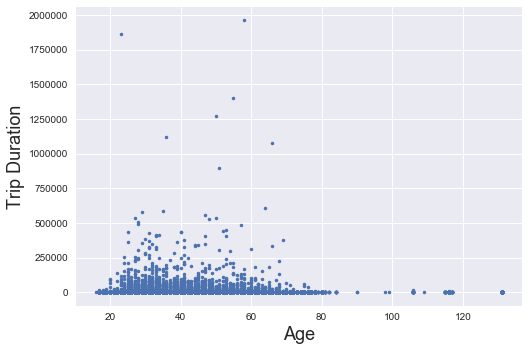

In [64]:
pl.plot(Age, DurationSort, '.')
pl.xlabel("Age", fontsize=18)
pl.ylabel("Trip Duration", fontsize=18)

# Figure 2: citibke Trip duration vs age, with data sorted by age (preserving pairing)

In [58]:
correlation = scipy.stats.pearsonr(Age, DurationSort)
correlation

(0.0014855262839027813, 0.30091379043882793)

Text(0,0.5,'Trip Duration')

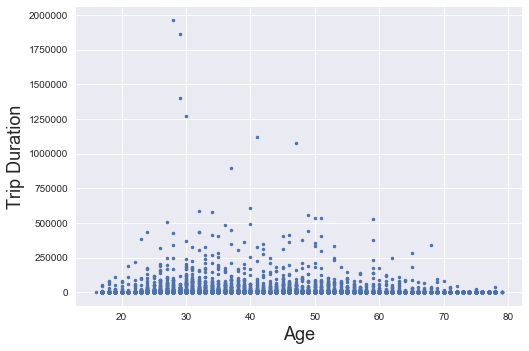

In [65]:
pl.plot(AgeReduct, DurationReductSort, '.')
pl.xlabel("Age", fontsize=18)
pl.ylabel("Trip Duration", fontsize=18)

# Figure 3: Trip duration vs age sorted by age and with age outliers removed (age>80 years)

In [60]:
correlation = scipy.stats.pearsonr(AgeReduct, DurationReductSort)
correlation

(-0.0019852506878085155, 0.16695319926106811)

In [61]:
correlation = scipy.stats.pearsonr(AgeReduct[DurationReductSort<500000], DurationReductSort[DurationReductSort<500000])
correlation

(-0.0011084435346559614, 0.440324043880153)

# the results of the correlation tests done on properly preprocessed data indicate no significant correlation between trip duration and age. However it may be interesting to investigate the same questions after dividing data between young (e.g. < 40 yo) and old (>40 yo) citibike riders.